STDLIB

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import ascii

Read in Data

In [2]:
data_path = './spectra_data/'

spiral_lambda, spiral_int = np.loadtxt(data_path + './NGC_4138-S-Uv-MIr-bms2014.txt', skiprows=0, usecols=(0,1), unpack=True)
ellip_lambda, ellip_int = np.loadtxt(data_path + './NGC_4168-S-Uv-MIr-bms2014.txt', skiprows=0, usecols=(0,1), unpack=True)
irr_lambda, irr_int = np.loadtxt(data_path + './IC_0691-S-Uv-MIr-bms2014.txt', skiprows=0, usecols=(0,1), unpack=True)
quas_lambda, quas_int = np.loadtxt(data_path + './vanden_berk_2001_comp_quas.txt', skiprows=23, usecols=(0,1), unpack=True)

hst_path = '/Users/Alex/Desktop/Kassin_summer_2016/hst_filters/'
f435w, f435t = np.loadtxt(hst_path + 'f435w.WFC1.dat', usecols=(1, 2), unpack=True, skiprows=4)
f475w, f475t = np.loadtxt(hst_path + 'wfc_F475W.dat', usecols=(0, 1), unpack=True)
f555w, f555t = np.loadtxt(hst_path + 'wfc_F555W.dat', usecols=(0, 1), unpack=True)
f606w, f606t = np.loadtxt(hst_path + 'f606w.WFC1.dat', usecols=(1, 2), unpack=True, skiprows=4)
f775w, f775t = np.loadtxt(hst_path + 'f775w.WFC1.dat', usecols=(1, 2), unpack=True, skiprows=4)

a0v_lambda, a0v_int = np.loadtxt(data_path + './uka0v.dat', skiprows=3, usecols=(0,1), unpack=True)
g2v_lambda, g2v_int = np.loadtxt(data_path + './ukg2v.dat', skiprows=3, usecols=(0,1), unpack=True)
m2i_lambda, m2i_int = np.loadtxt(data_path + './ukm2i.dat', skiprows=3, usecols=(0,1), unpack=True)
m4v_lambda, m4v_int = np.loadtxt(data_path + './ukm4v.dat', skiprows=3, usecols=(0,1), unpack=True)
o5v_lambda, o5v_int = np.loadtxt(data_path + './uko5v.dat', skiprows=3, usecols=(0,1), unpack=True)

star_low, star_high = 501, 1250

dust_lambda, dust_cs = np.loadtxt(data_path + './draine_rv_3_1.txt', skiprows=80, usecols=(0, 3), unpack=True)
sol_ab_lambda, sol_ab_flux = np.loadtxt(data_path + './E490_00a_AM0.txt', skiprows=1, usecols=(0,1), unpack=True)
sol_below = ascii.read(data_path + './ASTMG173.csv')
sky_emiss_lambda, sky_emiss_flux = np.loadtxt(data_path + './skybg_50_10.dat.txt', skiprows=14, usecols=(0,1), unpack=True)
sky_ex_lambda, sky_ex_mag = np.loadtxt(data_path + './MKextinction.txt', skiprows=6, usecols=(0, 1), unpack=True)

u_l, u_s = np.loadtxt(data_path + './u.dat.txt', skiprows=6, usecols=(0, 3), unpack=True)
u_l_e, u_s_e = np.loadtxt(data_path + './u.dat.txt', skiprows=6, usecols=(0, 2), unpack=True)

g_l, g_s = np.loadtxt(data_path + './g.dat.txt', skiprows=6, usecols=(0, 3), unpack=True)
g_l_e, g_s_e = np.loadtxt(data_path + './g.dat.txt', skiprows=6, usecols=(0, 2), unpack=True)

r_l, r_s = np.loadtxt(data_path + './r.dat.txt', skiprows=6, usecols=(0, 3), unpack=True)
r_l_e, r_s_e = np.loadtxt(data_path + './r.dat.txt', skiprows=6, usecols=(0, 2), unpack=True)

i_l, i_s = np.loadtxt(data_path + './i.dat.txt', skiprows=6, usecols=(0, 3), unpack=True)
i_l_e, i_s_e = np.loadtxt(data_path + './i.dat.txt', skiprows=6, usecols=(0, 2), unpack=True)

z_l, z_s = np.loadtxt(data_path + './z.dat.txt', skiprows=6, usecols=(0, 3), unpack=True)
z_l_e, z_s_e = np.loadtxt(data_path + './z.dat.txt', skiprows=6, usecols=(0, 2), unpack=True)

sdss_ext = ascii.read(data_path + './SDSS_sky_emission_spectrum.csv')

Plot

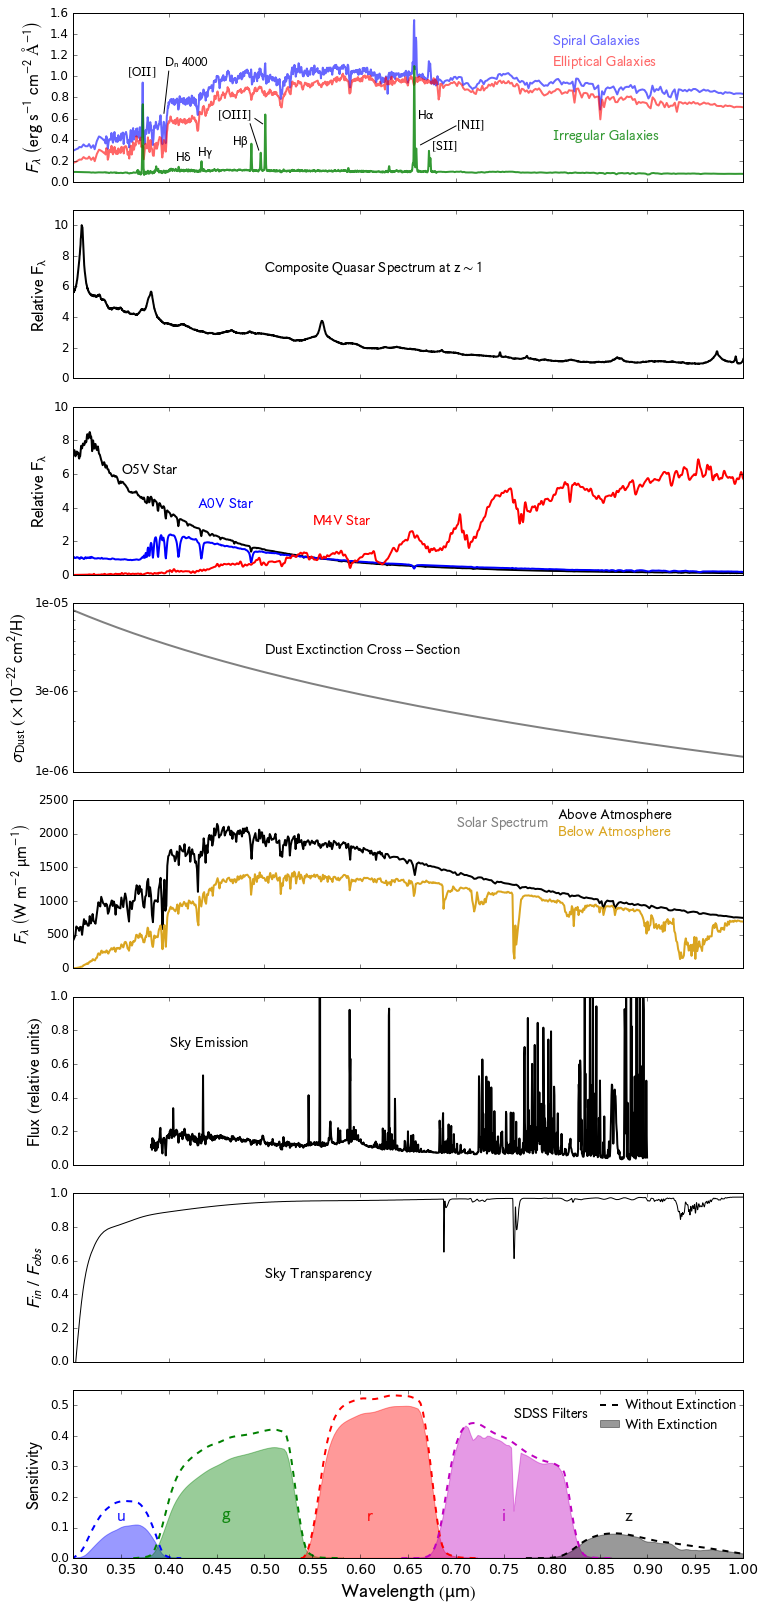

In [45]:
lbl_ft_sz = 18 # label font size
plot_lbl_ft_sz = 12

from matplotlib import rc # needed to modify TeX font; I don't like serif fonts too much
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)

fig, ax = plt.subplots(8, 1) # create figure
fig.set_figheight(22)
fig.set_figwidth(10)
fig.tight_layout()

#ax[6].spines['bottom'].set_visible(False)

ax[7].set_xlim(.3, 1)
ax[7].set_xticks(np.linspace(.3, 1, 15))
plt.setp([a.get_xticklabels() for a in ax[0:7]], visible=False)
plt.setp([a.get_yticklabels() for a in ax], fontsize=12)

plt.setp(ax[7].get_xticklabels(), fontsize=14) # make x-axis tick marks larger
ax[7].set_xlabel(r'$\rm{Wavelength} \ \left(\mu m \right)$', size=lbl_ft_sz + 2) # label x-axis

# galaxies
ax[0].set_xlim(0.3, 1)
ax[0].plot(spiral_lambda * 1e-4, spiral_int * 1e13, color='blue', linewidth=2, alpha=0.6)
ax[0].plot(ellip_lambda * 1e-4, ellip_int * 1e13, color='red', linewidth=2, alpha=0.6)
ax[0].plot(irr_lambda * 1e-4, irr_int * 1e13, color='green', linewidth=2, alpha=0.8)
ax[0].set_ylabel(r'$F_{\lambda} \ \left( \rm{erg} \ \rm{s}^{-1} \ \rm{cm}^{-2} \ \rm{\AA}^{-1} \right)$', size=lbl_ft_sz - 1)
ax[0].text(0.8, 1.3, r'$\rm{Spiral \ Galaxies}$', color='blue', size=lbl_ft_sz - 3, alpha=0.6)
ax[0].text(0.8, 1.1, r'$\rm{Elliptical \ Galaxies}$', color='red', size=lbl_ft_sz - 3, alpha=0.6)
ax[0].text(0.8, 0.4, r'$\rm{Irregular \ Galaxies}$', color='green', size=lbl_ft_sz - 3, alpha=0.8)

# quasar
ax[1].set_xlim(0.3, 1)
ax[1].set_ylim(0, 11)
ax[1].plot((quas_lambda * 1e-4) * 2, quas_int, color='k', linewidth=2)
ax[1].text(0.5, 7, r'$\rm{Composite \ Quasar \ Spectrum \ at} \ z \sim 1$', size=lbl_ft_sz - 3)
ax[1].set_ylabel(r'$\rm{Relative} \ F_{\lambda}$', size=lbl_ft_sz - 1)

# stars
ax[2].set_xlim(0.3, 1)
ax[2].set_ylim(0, 10)
ax[2].plot(o5v_lambda * 1e-4, o5v_int, color='black', linewidth=2)
ax[2].plot(a0v_lambda * 1e-4, a0v_int, color='blue', linewidth=2)
ax[2].plot(m4v_lambda * 1e-4, m4v_int, color='red', linewidth=2)
ax[2].text(.3500, 6, r'$\rm{O5V \ Star}$', color='black', size=lbl_ft_sz - 3)
ax[2].text(.4300, 4, r'$\rm{A0V \ Star}$', color='blue', size=lbl_ft_sz - 3)
ax[2].text(.5500, 3, r'$\rm{M4V \ Star}$', color='red', size=lbl_ft_sz - 3)
ax[2].set_ylabel(r'$\rm{Relative} \ F_{\lambda}$', size=lbl_ft_sz - 1)

# dust
ax[3].set_xlim(0.3, 1)
ax[3].set_ylim(1e-6, 1e-5)
ax[3].semilogy(dust_lambda * 1e-4, dust_cs * 1e22, color='gray', linewidth=2)
ax[3].set_ylabel(r'$\sigma_{\rm{Dust}} \ (\times 10^{-22} \ \rm{cm}^2 / \rm{H})$', size=lbl_ft_sz - 1)
ax[3].set_ylim(1e-6, 1e-5)
ax[3].text(0.5, 5e-6, r'$\rm{Dust \ Exctinction \ Cross-Section}$', size=lbl_ft_sz-3)
ax[3].set_yticklabels([1e-6, 3e-6, 1e-5])
ax[3].set_yticks([1e-6, 3e-6, 1e-5])

# solar spectrum
ax[4].set_xlim(0.3, 1)
ax[4].plot(sol_ab_lambda[180:697], sol_ab_flux[180:697], color='black', linewidth=2)
ax[4].plot(sol_below['Wvlgth nm'] * 1e-3, 1e3 * sol_below['Direct+circumsolar W*m-2*nm-1'], color='goldenrod', linewidth=2)
ax[4].set_ylabel(r'$F_{\lambda} \ \left( \rm{W \ m}^{-2} \ \mu \rm{m}^{-1} \right)$', size=lbl_ft_sz - 1)
ax[4].text(.7, 2100, r'$\rm{Solar \ Spectrum}$', size=lbl_ft_sz-3, color='gray')
ax[4].text(.805, 2225, r'$\rm{Above \ Atmosphere}$', size=lbl_ft_sz-3)
ax[4].text(.805, 1975, r'$\rm{Below \ Atmosphere}$', size=lbl_ft_sz-3, color='goldenrod')

# sky emission
ax[5].plot(sdss_ext['lambda [Angstrom]'] * 1e-4, sdss_ext['atmospheric_emission [arbitrary flux units]'], color='k', linewidth=2)
ax[5].set_ylim(0, 1)
ax[5].set_xlim(0.3, 1)
ax[5].set_ylabel(r'$\rm{Flux \ (relative \ units)}$', size=lbl_ft_sz-1)
ax[5].text(.4, .7, r'$\rm{Sky \ Emission}$', size=lbl_ft_sz - 3)

# sky extinction
ax[6].plot(sky_ex_lambda * 1e-4, 1 - ((10 ** -.4) * sky_ex_mag), color='k')
ax[6].set_ylim(0, 1)
ax[6].set_xlim(0.3, 1)
ax[6].set_ylabel(r'$F_{in} \ / \ F_{obs}$', size=lbl_ft_sz)
ax[6].text(0.5, 0.5, r'$\rm{Sky \ Transparency}$', size=lbl_ft_sz-3)

# sloan shit
ax[7].fill(u_l_e * 1e-4, u_s_e, fc='blue', ec='blue', alpha=0.4)
ax[7].plot(u_l * 1e-4, u_s, color='blue', linestyle='--', linewidth=2)
ax[7].fill(g_l_e * 1e-4, g_s_e, fc='green', ec='green', alpha=0.4)
ax[7].plot(g_l * 1e-4, g_s, color='green', linestyle='--', linewidth=2)
ax[7].fill(r_l_e * 1e-4, r_s_e, fc='red', ec='red', alpha=0.4)
ax[7].plot(r_l * 1e-4, r_s, color='red', linestyle='--', linewidth=2)
ax[7].fill(i_l_e * 1e-4, i_s_e, fc='m', ec='m', alpha=0.4)
ax[7].plot(i_l * 1e-4, i_s, color='m', linestyle='--', linewidth=2)
ax[7].fill(z_l_e * 1e-4, z_s_e, fc='k', ec='k', alpha=0.4)
ax[7].plot(z_l * 1e-4, z_s, color='k', linestyle='--', linewidth=2)
ax[7].set_ylim(0, .55)
kwargs = dict(fontsize=18, ha='center', va='center', alpha=0.9)
sl_h = 0.14
ax[7].text(.35, sl_h, r'$\rm{u}$', color='b', **kwargs)
ax[7].text(.46, sl_h, r'$\rm{g}$', color='g', **kwargs)
ax[7].text(.61, sl_h, r'$\rm{r}$', color='r', **kwargs)
ax[7].text(.75, sl_h, r'$\rm{i}$', color='m', **kwargs)
ax[7].text(.88, sl_h, r'$\rm{z}$', color='k', **kwargs)
ax[7].set_ylabel(r'$\rm{Sensitivity}$', size=lbl_ft_sz-1)
ax[7].text(.76, .46, r'$\rm{SDSS \ Filters}$', size=lbl_ft_sz-3)
ax[7].plot([.85, .875], [0.5, 0.5], color='black', linestyle='--', linewidth=2)
ax[7].text(.875, .49, r'$\rm{Without \ Extinction}$', size=lbl_ft_sz-3)
ax[7].fill([.85, .87, .87, .85, .85], [.45, .45, .43, .43, .45], fc='k', ec='k', alpha=0.4)
ax[7].text(.875, .425, r'$\rm{With \ Extinction}$', size=lbl_ft_sz-3)

# lines
ax[0].text(.395, 1.1, r'$\rm{D}_{\rm{n}} \ 4000$', color='black', size=lbl_ft_sz - 5)
ax[0].plot([.40, .395], [1.05, 0.65], color='black')
ax[0].text(.6595, 0.6, r'$\rm{H}\alpha$', color='black', size=lbl_ft_sz - 5)
ax[0].text(.674, 0.3, r'$[\rm{SII}]$', color='black', size=lbl_ft_sz - 5)
ax[0].text(.45, 0.6, r'$[\rm{OIII}]$', color='black', fontsize=lbl_ft_sz - 5)
ax[0].plot([.4850, .4940], [0.55, .3], color='black')
ax[0].plot([.490, .4980], [0.6, 0.55], color='black')
ax[0].text(.4660, .35, r'$\rm{H}\beta$', color='black', size=lbl_ft_sz - 5)
ax[0].text(.4300, .25, r'$\rm{H}\gamma$', color='black', size=lbl_ft_sz - 5)
ax[0].text(.4070, .2, r'$\rm{H}\delta$', color='black', size=lbl_ft_sz - 5)
ax[0].text(.356, 1, r'$[\rm{OII}]$', color='black', size=lbl_ft_sz - 5)
ax[0].text(0.7, 0.5, r'$[\rm{NII}]$', color='black', size=lbl_ft_sz - 5)
ax[0].plot([0.7, .663], [0.53, 0.35], color='black')

plt.savefig('sotzen_wang_delavega_171_618_spectra_plot_3.jpg', format='jpg', dpi=140, bbox_inches='tight')

plt.show()

Test Code Area

In [12]:
# f = plt.figure(figsize=(12,8))
# a = plt.subplot(111)

# a.set_xlim(3100, 7600)
# a.set_xticks(np.linspace(3500, 7500, 9))
# a.set_ylabel('Arbitrary Flux Shit')

# da = np.linspace(3500, 7500, 100)
# y = np.exp(-(da * 1e-3))
# sp = plt.axes([.125, .3, 0.775, 0.05])
# sp.semilogy(da, y)
# sp.set_xlim(3100, 7600)
# sp.text(3200, 0.001, r'H$\alpha$', size=20)
# sp.set_ylabel('Fuck')
# plt.setp(sp.get_xticklines(), visible=False)
# #sp.axis('off')

# plt.setp(sp, xticks=[], yticks=[])
# plt.setp(a.get_yticklabels(), visible=False)
# plt.setp(a.get_yticklines(), visible=False)

# plt.show()

In [8]:
print np.min(1 - ((10 ** -.4) * sky_ex_mag[1000:5000]))

0.61184550871
